In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn import metrics

warnings.filterwarnings('ignore')


from sklearn import model_selection
from sklearn.model_selection import cross_val_score


In [1]:
import pandas_profiling


In [3]:
year='2017'
df=pd.read_csv('data/combined_team_stats_'+year+'.csv',index_col=0).dropna(axis=1)
df.keys()
df.drop(['School','wpct','sched_url','Rank','WL','Conf'],axis=1)

,SRS,SOS,TmPts,OppPts,Pace,ORtg,FTr,3PAr,TS%,TRB%,...,fullName,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM.1,OppO,OppD,NCSOS_AdjEM
0,-11.86,-7.10,2009,2073,68.0,100.1,0.232,0.354,0.554,47.1,...,Abilene Christian,-11.86,97.0,108.8,65.8,0.049,-5.96,101.7,107.6,1.15
1,-3.06,1.00,2411,2477,69.0,104.6,0.273,0.388,0.544,50.3,...,Air Force,-5.22,104.3,109.5,67.1,-0.065,0.29,104.4,104.1,-6.10
2,3.59,-1.21,2772,2550,68.0,113.1,0.250,0.484,0.580,51.2,...,Akron,6.10,112.6,106.4,66.3,0.084,-1.48,104.2,105.7,-5.23
3,-26.99,-11.09,1794,2255,65.4,93.4,0.265,0.289,0.487,46.4,...,Alabama A&M,-30.34,91.4,121.8,64.3,-0.075,-10.15,98.7,108.9,1.08
4,-1.17,-1.83,2369,2316,67.8,105.1,0.274,0.322,0.556,52.4,...,Alabama-Birmingham,-2.52,103.9,106.4,66.1,-0.008,-2.45,103.6,106.0,0.08
5,-19.75,-10.75,2042,2305,69.6,93.2,0.220,0.368,0.478,50.4,...,Alabama State,-21.65,91.1,112.8,68.4,-0.007,-9.97,99.0,109.0,2.65
6,11.29,7.47,2330,2200,67.4,100.3,0.255,0.372,0.515,53.8,...,Alabama,13.08,105.3,92.2,65.1,-0.055,7.16,108.1,100.9,-1.64
7,-0.16,-4.69,2496,2301,65.3,109.2,0.252,0.266,0.555,55.5,...,Albany (NY),2.66,107.5,104.9,64.2,-0.038,-5.16,101.8,106.9,-2.00
8,-12.33,-10.95,2221,2175,69.2,100.0,0.214,0.359,0.515,51.4,...,Alcorn State,-10.50,95.5,106.0,67.8,0.048,-11.09,98.1,109.2,11.03
9,-10.30,-3.50,1845,2049,65.2,94.0,0.190,0.343,0.522,46.6,...,American,-12.94,95.2,108.1,64.3,-0.017,-4.21,101.6,105.8,-4.47


In [24]:
dfClean=df.drop(['School','wpct','sched_url','Rank','WL','FTr','Conf','name','fullName'],axis=1)
profile=pandas_profiling.ProfileReport(dfClean)
rejected=profile.get_rejected_variables(threshold=0.99)
rejected

['AdjEM']

In [25]:
profile

Number of variables,25
Number of observations,351
Total Missing (%),0.0%
Total size in memory,81.3 KiB
Average record size in memory,237.2 B
Numeric,19
Categorical,0
Date,0
Text (Unique),0
Rejected,6
Distinct count,167


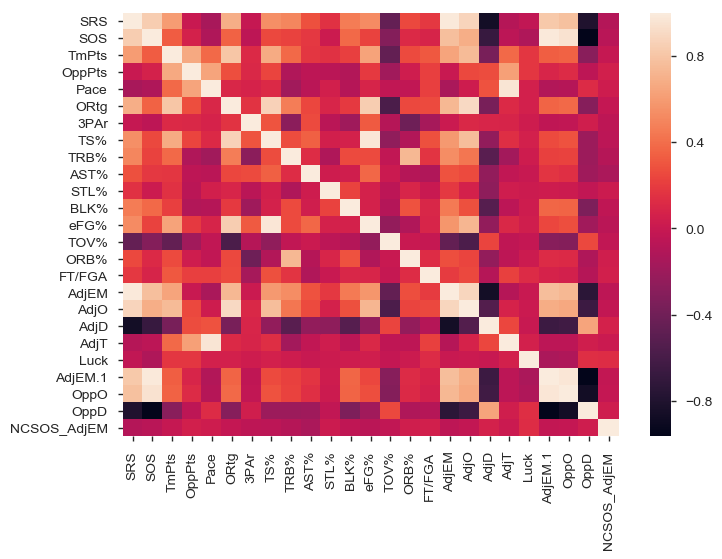

In [26]:
import seaborn as sns
corr=dfClean.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap=)

In [ ]:
df.to_sql

[ 0.34061896  0.4861018   0.5803578   0.66383461  0.72082376  0.76867624
  0.81531471  0.85388184  0.88720339  0.9116265   0.93546545  0.95702306
  0.97630147  0.98896717  0.99466909  0.99750283  0.9984258   0.9990367
  0.99944273  0.99971832  0.99989662  0.99995317  0.99999864  0.99999974
  1.          1.        ]
[ 0.34076378  0.47921029  0.57843224  0.670249    0.73134658  0.77629459
  0.81929417  0.85576324  0.89014946  0.91516192  0.93841494  0.95871996
  0.97554833  0.98914223  0.99485965  0.99741349  0.99838506  0.99899361
  0.99945621  0.9997407   0.99988512  0.99994657  0.99999876  0.99999975
  1.          1.        ]
[ 0.3327443   0.47439988  0.57762894  0.66716914  0.73155206  0.77840703
  0.82303214  0.85809971  0.88762284  0.91339657  0.9367659   0.95739689
  0.97354545  0.98681777  0.99427814  0.99699679  0.99818314  0.99878963
  0.99932095  0.99967034  0.99988107  0.99994469  0.99999836  0.99999972
  1.          1.        ]
[ 0.33173581  0.47553313  0.581526    0.6654140

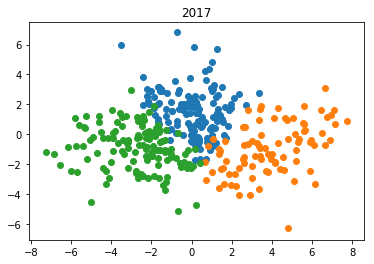

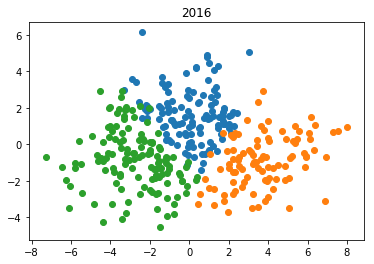

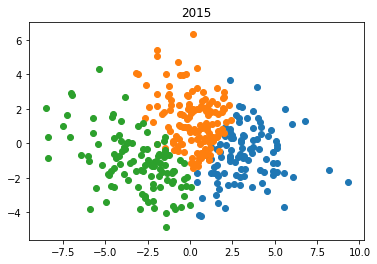

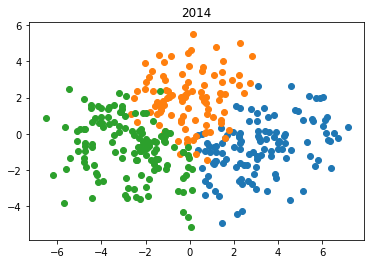

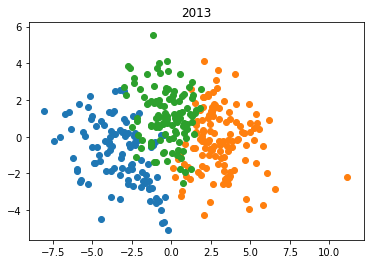

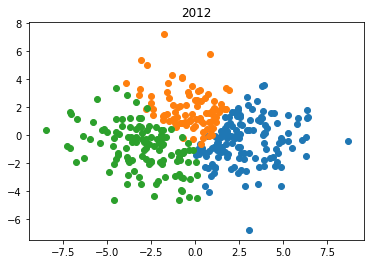

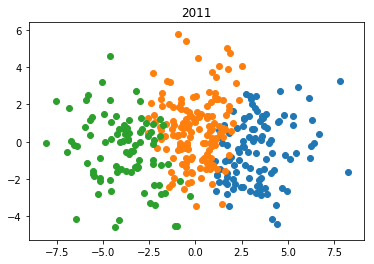

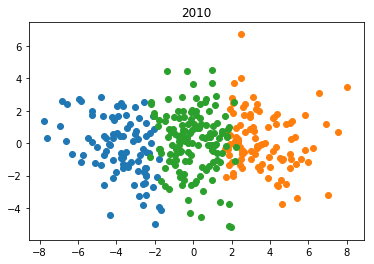

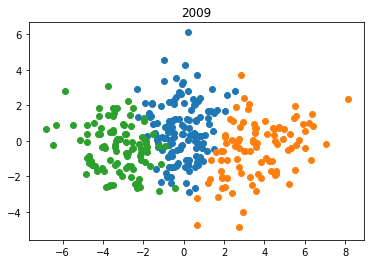

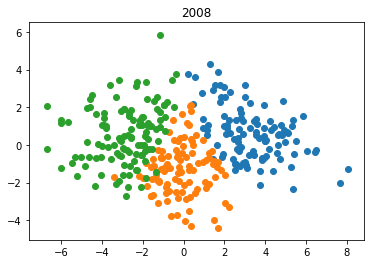

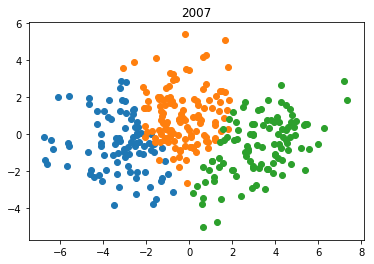

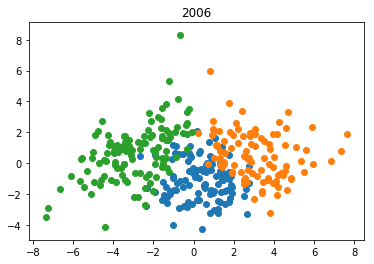

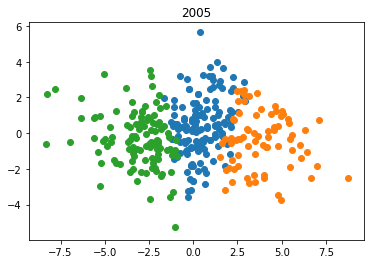

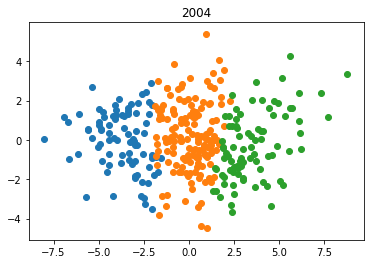

In [39]:
for yr in np.arange(2017,2003,-1):
    year = str(yr)
    df=pd.read_csv('data/combined_team_stats_'+year+'.csv',index_col=0).dropna(axis=1)
    dfOrig=df

    dropLabels=['School','Conf','wpct','Rank','WL','sched_url']
    df=df.drop(dropLabels,axis=1)

    df.keys()

    features=['SRS', 'SOS', 'TmPts', 'OppPts', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%',
           'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
           'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'AdjEM.1', 'OppO', 'OppD',
           'NCSOS_AdjEM']
    
    

    from  sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    # X_train, X_test, y_train, y_test = train_test_split(features, train_size=0.8, random_state=42)
    scaler=StandardScaler().fit(df)

    scaled=scaler.transform(df)

    pca=PCA()
    pca.fit(scaled)
    X_pca=pca.transform(scaled)
    # plt.plot(np.cumsum(pca.explained_variance_ratio_))
    print(np.cumsum(pca.explained_variance_ratio_))

    from sklearn.cluster import KMeans

    pca=PCA(n_components=9)
    pca.fit(scaled)
    X_pca=pca.transform(scaled)

    # X_pca=df[['AdjO','AdjD']].values
    n_clusters=3
    km = KMeans(n_clusters=n_clusters).fit(X_pca)
    plt.figure()
    teamType={}
    for id in range(n_clusters):
        plt.scatter(X_pca[km.labels_==id,0],X_pca[km.labels_==id,1])
        for indx in np.where(km.labels_==id)[0]:
            teamType[dfOrig.loc[indx,'School']]=id
    #         if X_pca[indx,0]>10:
    #             print(id,indx,dfOrig.loc[indx,'School'])
    plt.title(yr)
    pd.DataFrame([[key,teamType[key]] for key in teamType.keys()],columns=['School','type']).to_csv('data/team_type_'+year+'.csv',index=False)